<a href="https://colab.research.google.com/github/amirmohammadkalateh/overfitting/blob/main/Max_Norm_regualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.4550


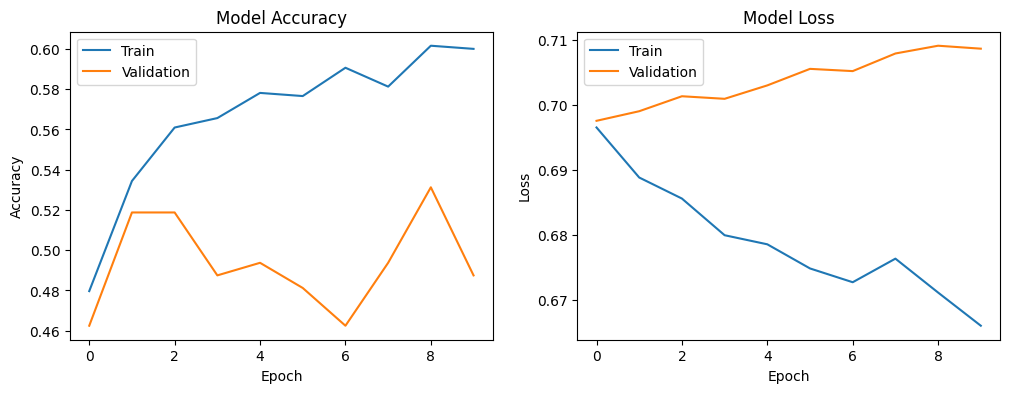

Model architecture visualization saved to 'model_with_maxnorm.png'


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import MaxNorm
import numpy as np
import matplotlib.pyplot as plt
import pydot
import keras.utils
from tensorflow.keras.utils import plot_model

# Define the model with Max-Norm regularization
def create_model_with_max_norm(max_value=2.0):
    """
    Creates a simple neural network model with Max-Norm regularization.

    Args:
        max_value (float): The maximum norm for the weights.  Defaults to 2.0.

    Returns:
        tf.keras.Model: The compiled neural network model.
    """
    model = Sequential([
        Dense(128, activation='relu', input_shape=(10,), kernel_constraint=MaxNorm(max_value)),
        Dense(64, activation='relu', kernel_constraint=MaxNorm(max_value)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a simple dataset for demonstration
def create_synthetic_data(num_samples=1000, num_features=10):
  """
  Generates synthetic data for binary classification.

  Args:
      num_samples (int): The number of samples to generate. Defaults to 1000.
      num_features (int): The number of features per sample. Defaults to 10.

  Returns:
      tuple: A tuple containing the features (X) and labels (y).
  """
  X = np.random.rand(num_samples, num_features)
  y = np.random.randint(0, 2, num_samples)
  return X, y

# Train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_accuracy

def plot_loss_and_accuracy(history):

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def main():
    """
    Main function to run the example.
    """
    # Create the dataset
    X, y = create_synthetic_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model with Max-Norm regularization
    model = create_model_with_max_norm(max_value=2.0) # You can change max_value
    history, test_loss, test_accuracy = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

    # Print the test accuracy
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Plot the training history
    plot_loss_and_accuracy(history)

    # Visualize the model architecture
    plot_model(model, to_file='model_with_maxnorm.png', show_shapes=True, show_layer_names=True)
    print("Model architecture visualization saved to 'model_with_maxnorm.png'")

# Split data into training and testing sets.
def train_test_split(X, y, test_size=0.2, random_state=42):

    if test_size < 0 or test_size > 1:
        raise ValueError("test_size must be between 0 and 1")

    if random_state is not None:
        np.random.seed(random_state)

    # Calculate the number of test samples
    num_samples = X.shape[0]
    num_test_samples = int(num_samples * test_size)

    # Create an array of indices and shuffle it
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    # Split the indices into test and train indices
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]

    # Use the indices to create the test and train sets
    X_test, y_test = X[test_indices], y[test_indices]
    X_train, y_train = X[train_indices], y[train_indices]

    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    main()
